#Análisis de sentimientos

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SeminarioIA/Dataset/IMDB Dataset.csv')
df_positive = dataset[dataset['sentiment']=='positive']
df_negative = dataset[dataset['sentiment']=='negative']

df_review_imb = pd.concat([df_positive,df_negative ])
dataset.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

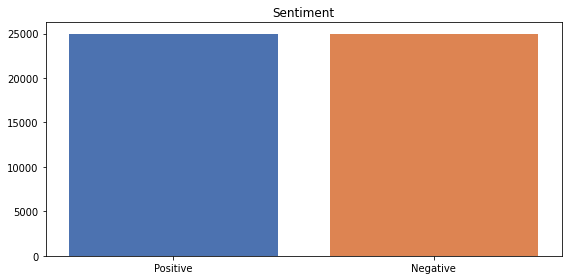

In [ ]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review_imb.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

In [ ]:
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


##Prueba sin Pre-procesado

**Term frequency - Inverse document frequency**

Utilizaremos el vectorizador TF-IDF pre-construido de la biblioteca sklearn. Creando una matriz de términos de documentos (DTM) utilizando TF-IDF.

- Es una técnica que expresa que tan relevante es una palabra para un documento (texto).
- TF-IDF es el producto de dos medidas
    - **Term Frequency:** Mide el número de veces que un término (palabra) aparece en el documento.
    - **Inverse Document Frequency:** Mide si el término es común o no, en el documento.

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
text_count_matrix = tfidf.fit_transform(dataset.review)

In [ ]:
#División del dataset en un conjunto de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_count_matrix, dataset.sentiment, test_size=0.30, random_state=2)

In [ ]:
#Convertimos los sentimientos (positivos y negativos) en valores 1 y 0
y_train = (y_train.replace({'positive': 1, 'negative': 0})).values
y_test = (y_test.replace({'positive': 1, 'negative': 0})).values

In [ ]:
# Usamos el modelo de Multinomial Naive Bayes para realizar un ajuste
from sklearn.naive_bayes import MultinomialNB 
MNB = MultinomialNB()
MNB.fit(x_train, y_train)
#Se evalua el modelo
from sklearn import metrics
accuracy_score = metrics.accuracy_score(MNB.predict(x_test), y_test)
print("accuracy_score without data pre-processing = " + str('{:04.2f}'.format(accuracy_score*100))+" %")

accuracy_score without data pre-processing = 89.17 %


## Librería NLTK y datos adicionales

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##Preprocesamiento de los datos

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
lemmatizer = nltk.stem.WordNetLemmatizer()
#print(df.review[4])

processed_review = []
single_review = "string to iniialize <br /> my email id is charilie@waoow.com. You can also reach to me at charlie's "
reviews = dataset.review
for review in range(0,50000):
    single_review = dataset.loc[review,'review']
    
    #Se comenza el procesado con una sola opinion 
    
    #Removemos etiquetas html
    single_review = re.sub('<.*?>',' ',single_review)
    #Removemos caracteres especiales '@,!' e.t.c.
    single_review = re.sub('\W',' ',single_review)
    #Removemos caracteres unicos
    single_review = re.sub('\s+[a-zA-Z]\s+',' ', single_review)
    #Sustituimos multiples espacios por uno solo
    single_review = re.sub('\s+',' ', single_review)
   
    #removemos las stopwords
    word_tokens = word_tokenize(single_review)
    #lematización
    filtered_sentence = []
    filtered_sentence2 = " ".join([w for w in word_tokens if w not in stop_words])
    
    
    #Compilamos las oraciones para hacer un diccionario completo del texto procesado
    processed_review.append(filtered_sentence2)
    
print(processed_review[10])


Phil Alien one quirky films humour based around oddness everything rather actual punchlines At first odd pretty funny movie progressed find jokes oddness funny anymore Its low budget film thats never problem pretty interesting characters eventually lost interest imagine film would appeal stoner currently partaking For something similar better try Brother another planet


In [ ]:
text_count_matrix2 = tfidf.fit_transform(processed_review)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(text_count_matrix2, dataset.sentiment, test_size=0.30, random_state=2)

In [ ]:
Y_train = (Y_train.replace({'positive': 1, 'negative': 0})).values
Y_test = (Y_test.replace({'positive': 1, 'negative': 0})).values

##Multinomial Naive Bayes

Este tipo de análisis estadístico se utiliza a menudo para el análisis predictivo y el modelado, y se extiende a las aplicaciones del aprendizaje automático. En este enfoque analítico, la variable dependiente es finita o categórica.
Se utiliza en el software estadístico para comprender la relación entre la variable dependiente y una o más variables independientes mediante la estimación de probabilidades utilizando una ecuación de regresión logística.

In [ ]:
MNB.fit(X_train, Y_train)
# Evaluamos el modelo
MNBaccuracy_score = metrics.accuracy_score(MNB.predict(X_test), Y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("MNB accuracy = " + str('{:04.2f}'.format(accuracy_score*100))+" %")
print("Classification Report: \n", classification_report(Y_test, MNB.predict(X_test),target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(Y_test, MNB.predict(X_test)))

MNB accuracy = 89.17 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.89      0.89      0.89      7499
    Positive       0.89      0.89      0.89      7501

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

Confusion Matrix: 
 [[6689  810]
 [ 798 6703]]


## Máquina de Vector de Soporte 


El objetivo del algoritmo de la máquina de vectores de soporte es encontrar un hiperplano en un espacio de N dimensiones que clasifique claramente los puntos de datos. Después de dar a un modelo SVM conjuntos de datos de entrenamiento etiquetados para cada categoría, son capaces de categorizar un nuevo texto.

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

In [ ]:
LSVC = LinearSVC()
LSVC.fit(X_train, Y_train)
SVGaccuracy_score = metrics.accuracy_score(LSVC.predict(X_test), Y_test)
print("Linear SVC accuracy = " + str('{:04.2f}'.format(accuracy_score*100))+" %")
print("Classification Report: \n", classification_report(Y_test, LSVC.predict(X_test),target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(Y_test, LSVC.predict(X_test)))

Linear SVC accuracy = 89.17 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.92      0.90      0.91      7499
    Positive       0.90      0.92      0.91      7501

    accuracy                           0.91     15000
   macro avg       0.91      0.91      0.91     15000
weighted avg       0.91      0.91      0.91     15000

Confusion Matrix: 
 [[6746  753]
 [ 578 6923]]


##Regresión Logística

Este tipo de análisis estadístico se utiliza a menudo para el análisis predictivo y el modelado, y se extiende a las aplicaciones del aprendizaje automático. En este enfoque analítico, la variable dependiente es finita o categórica.
Se utiliza en el software estadístico para comprender la relación entre la variable dependiente y una o más variables independientes mediante la estimación de probabilidades utilizando una ecuación de regresión logística. 

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predict = LR.predict(X_test)
LRaccuracy_score = metrics.accuracy_score(predict, Y_test)
print("LR = " + str('{:04.2f}'.format(accuracy_score*100))+" %")
print("Classification Report: \n", classification_report(Y_test, predict,target_names=['Negative','Positive']))
print("Confusion Matrix: \n", confusion_matrix(Y_test, predict))

LR = 89.17 %
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.91      0.88      0.90      7499
    Positive       0.89      0.91      0.90      7501

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000

Confusion Matrix: 
 [[6611  888]
 [ 645 6856]]


In [ ]:
print("LR = " + str('{:04.2f}'.format(LRaccuracy_score*100))+" %")
print("Linear SVC accuracy = " + str('{:04.2f}'.format(SVGaccuracy_score*100))+" %")
print("MNB accuracy = " + str('{:04.2f}'.format(MNBaccuracy_score*100))+" %")


LR = 89.78 %
Linear SVC accuracy = 91.13 %
MNB accuracy = 89.28 %


##Prueba con comentarios 

In [ ]:
print(LSVC.predict(tfidf.transform(['While is not the worst superhero comic book adventure ever to grace the multiplex, its likely the most frustratingly disappointing.'])))
print(LSVC.predict(tfidf.transform(['Batman v. Superman: Dawn of Justice pits the two titans against each other with beautiful visuals, too many characters, and a borderline nonsensical plot.'])))
print(LSVC.predict(tfidf.transform(['As this uneven film grinds to an end, it sets itself up for more shenanigans in more episodes with more super heroes.'])))

[0]
[1]
[1]
